<a href="https://colab.research.google.com/github/nair-varsha/Customer-Demographics-Analysis/blob/main/Customer_Demographics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

In [ ]:
!pip install pywaffle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

# **<font color="navy">**<font face="Times New Roman"> **Loading the Dataset**
## **</font></font>**

In [ ]:
# Load the Excel file

df=pd.read_excel("/content/drive/MyDrive/Customer Demographics Analysis.xlsx")
print(df)

     Customer_ID  Age  Gender Item Purchased     Category  Purchase Amount   \
0    37-611-6911   55    Male         Blouse     Clothing                53   
1    29-392-9296   19  Female        Sweater     Clothing                64   
2    84-649-5117   50    Male          Jeans     Clothing                73   
3    48-980-6078   21    Male        Sandals     Footwear                90   
4    91-170-9072   45    Male         Blouse     Clothing                49   
..           ...  ...     ...            ...          ...               ...   
104  89-883-2104   55  Female     Sunglasses  Accessories                24   
105  00-477-9452   69  Female       Backpack  Accessories                96   
106  67-159-7369   64  Female         Jacket    Outerwear                35   
107  85-691-4296   28  Female       Sneakers     Footwear                67   
108  56-085-0467   70  Female          Socks     Clothing                79   

     Location Size      Color  Season  ...  Engagem

# <font color="red">**1)	DATA CLEANING**</font>

# **<font color="navy">**<font face="Times New Roman"> **1. Return 1st 10 Rows of Dataset**
## **</font></font>**

In [ ]:
df.head(10)

,Customer_ID,Age,Gender,Item Purchased,Category,Purchase Amount,Location,Size,Color,Season,...,Engagement_with_Ads,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision,Quantity,Price per Unit,Total Amount
0,37-611-6911,55,Male,Blouse,Clothing,53,Mumbai,L,Gray,Winter,...,NaN,2024-01-03 00:00:00,True,False,Need-based,No Preference,2,3,50,150
1,29-392-9296,19,Female,Sweater,Clothing,64,Mumbai,L,Maroon,Winter,...,High,4/16/2024,True,False,Wants-based,Standard,6,2,500,1000
2,84-649-5117,50,Male,Jeans,Clothing,73,Mumbai,S,Maroon,Spring,...,Low,3/15/2024,True,True,Impulsive,No Preference,3,1,30,30
3,48-980-6078,21,Male,Sandals,Footwear,90,Kolkata,M,Maroon,Spring,...,NaN,2024-04-10 00:00:00,True,True,Need-based,Express,10,1,500,500
4,91-170-9072,45,Male,Blouse,Clothing,49,Delhi,M,Turquoise,Spring,...,NaN,1/30/2024,False,False,Wants-based,No Preference,4,2,50,100
5,82-561-4233,46,Female,Sneakers,Footwear,20,Bangalore,M,White,Summer,...,NaN,3/19/2024,False,False,Planned,No Preference,7,1,30,30
6,90-144-9193,63,Male,Shirt,Clothing,85,Kolkata,M,Gray,Fall,...,Low,3/15/2024,True,False,Need-based,Express,13,2,25,50
7,88-661-4689,27,Male,Shorts,Clothing,34,Bangalore,L,Charcoal,Winter,...,NaN,3/17/2024,False,True,Impulsive,No Preference,13,4,25,100
8,37-065-3182,26,Male,Coat,Outerwear,97,Mumbai,L,Silver,Summer,...,High,2024-10-06 00:00:00,False,False,Need-based,Standard,7,2,300,600
9,84-894-9222,57,Female,Handbag,Accessories,31,Chennai,M,Pink,Spring,...,Medium,2024-07-10 00:00:00,True,False,Need-based,No Preference,13,4,50,200


# **<font color="navy">**<font face="Times New Roman"> **2. Return last 10 Rows of Dataset**
## **</font></font>**

In [ ]:
df.tail(10)

,Customer_ID,Age,Gender,Item Purchased,Category,Purchase Amount,Location,Size,Color,Season,...,Engagement_with_Ads,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision,Quantity,Price per Unit,Total Amount
99,19-933-8098,26,Male,Hoodie,Clothing,40,Chennai,XL,Indigo,Summer,...,Low,11/29/2024,False,False,Wants-based,No Preference,7,1,30,30
100,80-684-5075,62,Male,Sunglasses,Accessories,98,Chennai,M,Maroon,Fall,...,High,2024-09-07 00:00:00,True,True,Wants-based,No Preference,3,2,300,600
101,23-302-7505,27,Female,Coat,Outerwear,85,Kolkata,S,White,Spring,...,NaN,2024-03-08 00:00:00,False,False,Need-based,Standard,14,2,25,50
102,90-069-8937,51,Female,Socks,Clothing,67,Kolkata,M,Violet,Winter,...,Low,2024-04-12 00:00:00,True,True,Impulsive,Standard,1,1,25,25
103,45-073-7246,54,Female,Boots,Footwear,89,Bangalore,L,Red,Winter,...,Medium,6/13/2024,False,True,Need-based,No Preference,9,2,500,1000
104,89-883-2104,55,Female,Sunglasses,Accessories,24,Location,M,Pink,Spring,...,Low,7/13/2024,True,False,Wants-based,No Preference,14,1,500,500
105,00-477-9452,69,Female,Backpack,Accessories,96,Mumbai,M,Charcoal,Fall,...,Medium,2024-04-09 00:00:00,False,False,Need-based,Standard,14,1,50,50
106,67-159-7369,64,Female,Jacket,Outerwear,35,Mumbai,XL,White,Summer,...,Medium,8/26/2024,True,True,Impulsive,Standard,3,4,300,1200
107,85-691-4296,28,Female,Sneakers,Footwear,67,Mumbai,L,Olive,Winter,...,High,2/25/2024,True,True,Need-based,Express,4,3,25,75
108,56-085-0467,70,Female,Socks,Clothing,79,Kolkata,M,Purple,Spring,...,Low,4/15/2024,True,True,Wants-based,Standard,7,4,500,2000


# **<font color="navy">**<font face="Times New Roman"> **3. Missing Values**
## **</font></font>**

In [ ]:
##    IDENTIFIYING MISSING VALUES

missing_values=df.isnull()
print(missing_values)

     Customer_ID    Age  Gender  Item Purchased  Category  Purchase Amount   \
0          False  False   False           False     False             False   
1          False  False   False           False     False             False   
2          False  False   False           False     False             False   
3          False  False   False           False     False             False   
4          False  False   False           False     False             False   
..           ...    ...     ...             ...       ...               ...   
104        False  False   False           False     False             False   
105        False  False   False           False     False             False   
106        False  False   False           False     False             False   
107        False  False   False           False     False             False   
108        False  False   False           False     False             False   

     Location   Size  Color  Season  ...  Engagemen

In [ ]:
##   REMOVING MISSING VALUES

df.dropna(inplace=True)
print(df.head())


    Customer_ID  Age  Gender Item Purchased   Category  Purchase Amount   \
1   29-392-9296   19  Female        Sweater   Clothing                64   
2   84-649-5117   50    Male          Jeans   Clothing                73   
6   90-144-9193   63    Male          Shirt   Clothing                85   
8   37-065-3182   26    Male           Coat  Outerwear                97   
10  44-674-4037   53    Male          Shoes   Footwear                34   

   Location Size   Color  Season  ...  Engagement_with_Ads  \
1    Mumbai    L  Maroon  Winter  ...                 High   
2    Mumbai    S  Maroon  Spring  ...                  Low   
6   Kolkata    M    Gray    Fall  ...                  Low   
8    Mumbai    L  Silver  Summer  ...                 High   
10  Kolkata    L  Purple    Fall  ...                 High   

       Time_of_Purchase Discount_Used  Customer_Loyalty_Program_Member  \
1             4/16/2024          True                            False   
2             3/15/202

# **<font color="navy">**<font face="Times New Roman">**4**. **Checking Duplicates**
## **</font></font>**

In [ ]:
#checking any duplicates are there or not

duplicates=df.duplicated()
print(duplicates)

1      False
2      False
6      False
8      False
10     False
11     False
12     False
13     False
15     False
16     False
23     False
25     False
26     False
28     False
29     False
31     False
35     False
37     False
39     False
40     False
41     False
42     False
50     False
51     False
54     False
55     False
56     False
57     False
59     False
62     False
65     False
67     False
68     False
69     False
71     False
72     False
73     False
74     False
75     False
80     False
81     False
82     False
83     False
84     False
85     False
86     False
87     False
88     False
93     False
94     False
99     False
100    False
103    False
104    False
105    False
106    False
107    False
dtype: bool


# **<font color="navy">**<font face="Times New Roman">**5**. **Removing Duplicates**

# **</font></font>**

In [ ]:
#removing duplicates in dataframe
remove_duplicates=df.drop_duplicates()
print(remove_duplicates)

     Customer_ID  Age  Gender Item Purchased     Category  Purchase Amount   \
1    29-392-9296   19  Female        Sweater     Clothing                64   
2    84-649-5117   50    Male          Jeans     Clothing                73   
6    90-144-9193   63    Male          Shirt     Clothing                85   
8    37-065-3182   26    Male           Coat    Outerwear                97   
10   44-674-4037   53    Male          Shoes     Footwear                34   
11   78-116-8349   30    Male         Shorts     Clothing                68   
12   19-933-8095   61    Male           Coat    Outerwear                72   
13   80-684-5072   65    Male          Dress     Clothing                51   
15   90-069-8934   64    Male          Skirt     Clothing                81   
16   45-073-7243   25  Female     Sunglasses  Accessories                36   
23   95-478-2650   31  Female          Pants     Clothing                88   
25   21-755-8745   18  Female         Hoodie     Clo

# **<font color="navy">**<font face="Times New Roman">**6**. **Format Column** **Name**s
## **</font></font>**

In [ ]:
#format column name to capitalize ,replace and remove whitespace

df.columns = df.columns.str.strip().str.capitalize().str.replace(' ', '_')
print(df)

     Customer_id  Age  Gender Item_purchased     Category  Purchase_amount  \
1    29-392-9296   19  Female        Sweater     Clothing               64   
2    84-649-5117   50    Male          Jeans     Clothing               73   
6    90-144-9193   63    Male          Shirt     Clothing               85   
8    37-065-3182   26    Male           Coat    Outerwear               97   
10   44-674-4037   53    Male          Shoes     Footwear               34   
11   78-116-8349   30    Male         Shorts     Clothing               68   
12   19-933-8095   61    Male           Coat    Outerwear               72   
13   80-684-5072   65    Male          Dress     Clothing               51   
15   90-069-8934   64    Male          Skirt     Clothing               81   
16   45-073-7243   25  Female     Sunglasses  Accessories               36   
23   95-478-2650   31  Female          Pants     Clothing               88   
25   21-755-8745   18  Female         Hoodie     Clothing       

# **<font color="navy">**<font face="Times New Roman">**7**. **Changing Float Datatypes**
## **</font></font>**

In [ ]:
#changing float datatype to integer

df["Time_spent_on_product_research(hours)"]=df["Time_spent_on_product_research(hours)"].astype(int) # Changed column name to reflect the new naming convention

new_dataframe=df["Time_spent_on_product_research(hours)"].head(10) # Changed column name to reflect the new naming convention

print(new_dataframe)

1     2
2     0
6     1
8     0
10    0
11    1
12    2
13    0
15    0
16    2
Name: Time_spent_on_product_research(hours), dtype: int64


# **<font color="navy">**<font face="Times New Roman">**8**. **Remove Specified Columns**
## **</font></font>**

In [ ]:
#removing column named"Purchase_amount"

df.drop(columns=['Purchase_amount' ], inplace=True)
df.columns

Index(['Customer_id', 'Age', 'Gender', 'Item_purchased', 'Category',
       'Location', 'Size', 'Color', 'Season', 'Review_rating',
       'Payment_method', 'Shipping_type', 'Previous_purchases',
       'Frequency_of_purchases', 'Purchase_channel', 'Brand_loyalty',
       'Product_rating', 'Time_spent_on_product_research(hours)',
       'Social_media_influence', 'Discount_sensitivity', 'Return_rate',
       'Customer_satisfaction', 'Engagement_with_ads', 'Time_of_purchase',
       'Discount_used', 'Customer_loyalty_program_member', 'Purchase_intent',
       'Shipping_preference', 'Time_to_decision', 'Quantity', 'Price_per_unit',
       'Total_amount'],
      dtype='object')

# **<font color="navy">**<font face="Times New Roman">**9**. **Show specified Columns**
## **</font></font>**

In [ ]:
#show only top 5 columns such as customer id,Age,Gender,Item purchased

new_columns=df[['Customer_id', 'Age', 'Gender', 'Item_purchased']]
new_columns.head()


,Customer_id,Age,Gender,Item_purchased
1,29-392-9296,19,Female,Sweater
2,84-649-5117,50,Male,Jeans
6,90-144-9193,63,Male,Shirt
8,37-065-3182,26,Male,Coat
10,44-674-4037,53,Male,Shoes


# **<font color="navy">**<font face="Times New Roman">**10**. **Sort dataframe**
## **</font></font>**

In [ ]:
#sorting dataframe according to customer id

sorted_column=df.sort_values('Customer_id',ascending=True)
sorted_column.head(10)


,Customer_id,Age,Gender,Item_purchased,Category,Location,Size,Color,Season,Review_rating,...,Engagement_with_ads,Time_of_purchase,Discount_used,Customer_loyalty_program_member,Purchase_intent,Shipping_preference,Time_to_decision,Quantity,Price_per_unit,Total_amount
105,00-477-9452,69,Female,Backpack,Accessories,Mumbai,M,Charcoal,Fall,3.6,...,Medium,2024-04-09 00:00:00,False,False,Need-based,Standard,14,1,50,50
82,04-349-6761,19,Male,Pants,Clothing,Delhi,S,Olive,Spring,4.0,...,High,3/29/2024,False,False,Wants-based,Express,9,2,50,100
12,19-933-8095,61,Male,Coat,Outerwear,Kolkata,M,Gold,Winter,4.5,...,High,2024-05-08 00:00:00,True,True,Need-based,No Preference,5,3,500,1500
41,19-933-8096,67,Male,Scarf,Accessories,Bangalore,M,Orange,Spring,4.5,...,Low,11/17/2024,False,False,Impulsive,Standard,1,3,300,900
99,19-933-8098,26,Male,Hoodie,Clothing,Chennai,XL,Indigo,Summer,3.7,...,Low,11/29/2024,False,False,Wants-based,No Preference,7,1,30,30
25,21-755-8745,18,Female,Hoodie,Clothing,Location,M,Silver,Summer,3.6,...,High,5/31/2024,True,True,Planned,Standard,10,2,500,1000
54,21-755-8746,47,Male,Coat,Outerwear,Mumbai,M,Brown,Summer,4.2,...,Low,2024-12-06 00:00:00,False,False,Planned,No Preference,14,4,30,120
83,21-755-8747,36,Female,Dress,Clothing,Bangalore,XL,Turquoise,Summer,4.1,...,High,2024-06-06 00:00:00,False,True,Impulsive,No Preference,13,3,30,90
72,23-302-7504,18,Male,Dress,Clothing,Chennai,M,Olive,Winter,2.9,...,Medium,6/14/2024,True,True,Wants-based,Standard,10,3,30,90
1,29-392-9296,19,Female,Sweater,Clothing,Mumbai,L,Maroon,Winter,3.1,...,High,4/16/2024,True,False,Wants-based,Standard,6,2,500,1000


# **<font color="navy">**<font face="Times New Roman">**11**. **Changing Format of Date**  
## **</font></font>**

In [ ]:
#changing column Time_of_purchase to DD-MM-YY format

# Convert 'Time_of_purchase' to datetime objects before applying strftime
df['Time_of_purchase'] = pd.to_datetime(df['Time_of_purchase'])
df['Time_of_purchase'] = df['Time_of_purchase'].dt.strftime('%d/%m/%Y')
print(df["Time_of_purchase"].head())

1     16/04/2024
2     15/03/2024
6     15/03/2024
8     06/10/2024
10    07/02/2024
Name: Time_of_purchase, dtype: object


# <font color="red">**2)	Exploratory Data Analysis( EDA )**</font>

# **<font color="navy">**<font face="Times New Roman"> **Explore the dataset**
## **</font></font>**

In [ ]:
#showing information and describing the dataset

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 1 to 107
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_id                            57 non-null     object 
 1   Age                                    57 non-null     int64  
 2   Gender                                 57 non-null     object 
 3   Item_purchased                         57 non-null     object 
 4   Category                               57 non-null     object 
 5   Location                               57 non-null     object 
 6   Size                                   57 non-null     object 
 7   Color                                  57 non-null     object 
 8   Season                                 57 non-null     object 
 9   Review_rating                          57 non-null     float64
 10  Payment_method                         57 non-null     object 
 11  Shipping_typ

,Age,Review_rating,Previous_purchases,Brand_loyalty,Product_rating,Time_spent_on_product_research(hours),Return_rate,Customer_satisfaction,Time_to_decision,Quantity,Price_per_unit,Total_amount
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,44.982456,3.868421,27.421053,3.087719,3.245614,0.859649,0.807018,4.771930,7.877193,2.403509,185.701754,448.421053
std,16.400666,0.682474,15.258426,1.430293,1.550123,0.833208,0.789181,2.790402,3.864075,1.083309,189.018703,553.441472
min,18.000000,2.600000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,25.000000,30.000000
25%,31.000000,3.300000,14.000000,2.000000,2.000000,0.000000,0.000000,2.000000,5.000000,1.000000,30.000000,75.000000
50%,48.000000,4.000000,31.000000,3.000000,4.000000,1.000000,1.000000,5.000000,8.000000,2.000000,50.000000,150.000000
75%,59.000000,4.400000,41.000000,4.000000,5.000000,2.000000,1.000000,7.000000,11.000000,3.000000,300.000000,900.000000
max,70.000000,4.900000,49.000000,5.000000,5.000000,2.000000,2.000000,10.000000,14.000000,4.000000,500.000000,2000.000000


## 📊 <font color="orange">**1. DESCRIPTIVE ANALYSIS**

# **<font color="navy">**<font face="Times New Roman"> **1. Count of customer by gender and location**
## **</font></font>**

In [ ]:
df[['Gender','Location']]             #return column- Gender and Location

,Gender,Location
1,Female,Mumbai
2,Male,Mumbai
6,Male,Kolkata
8,Male,Mumbai
10,Male,Kolkata
11,Male,Kolkata
12,Male,Kolkata
13,Male,Bangalore
15,Male,Bangalore
16,Female,Bangalore


In [ ]:
# Group by Gender and Location and count the number of customers
customer_counts = df.groupby(['Gender', 'Location']).size().reset_index(name='Customer Count')

# Sort the result by Customer Count in descending order
customer_counts = customer_counts.sort_values(by='Customer Count', ascending=False)

print(customer_counts)

    Gender   Location  Customer Count
6     Male  Bangalore              10
9     Male    Kolkata               9
0   Female  Bangalore               8
5   Female     Mumbai               7
3   Female    Kolkata               6
7     Male    Chennai               5
10    Male     Mumbai               4
4   Female   Location               3
1   Female    Chennai               3
2   Female      Delhi               1
8     Male      Delhi               1


# **<font color="navy">**<font face="Times New Roman"> **2. Average Age Of Customers**
## **</font></font>**

In [ ]:
#finding average by mean method
average_age=df.Age.mean()

print("AVERAGE AGE OF CUSTOMERS:",round(average_age,2))

AVERAGE AGE OF CUSTOMERS: 44.98


# **<font color="navy">**<font face="Times New Roman"> **3. Most Frequent Purchased Item**
## **</font></font>**

In [ ]:
df[['Item_purchased','Customer_id']]  ##checking column existence

,Item_purchased,Customer_id
1,Sweater,29-392-9296
2,Jeans,84-649-5117
6,Shirt,90-144-9193
8,Coat,37-065-3182
10,Shoes,44-674-4037
11,Shorts,78-116-8349
12,Coat,19-933-8095
13,Dress,80-684-5072
15,Skirt,90-069-8934
16,Sunglasses,45-073-7243


In [ ]:
# Group by 'Item_purchased' and count the occurrences
Purchased_counts = df.groupby(['Item_purchased'])['Customer_id'].count().reset_index(name='Purchased_counts')

# Sort the result by Purchased_counts in descending order
Purchased_counts = Purchased_counts.sort_values(by='Purchased_counts', ascending=False)

frequent_product=((Purchased_counts).head(1))
print(frequent_product)


  Item_purchased  Purchased_counts
4           Coat                 7


# **<font color="navy">**<font face="Times New Roman"> **4. Correlation Analysis of Numeric Columns with Total Amount**
## **</font></font>**

In [ ]:
# Ensure the column is named correctly (adjust if needed)
target_col = 'Total_amount'  # Changed to 'Total_amount' to match the column name in your DataFrame

# Filter numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate correlation with 'Total_amount'
correlations = numeric_df.corr()[target_col].drop(target_col).sort_values(ascending=False)

# Display correlation results
print("Correlation with Total Amount:\n", correlations)

Correlation with Total Amount:
 Price_per_unit                           0.849281
Quantity                                 0.390959
Time_spent_on_product_research(hours)    0.191004
Previous_purchases                       0.048653
Return_rate                              0.015848
Brand_loyalty                            0.005028
Purchase_amount                         -0.013114
Age                                     -0.050170
Time_to_decision                        -0.069941
Product_rating                          -0.081655
Customer_satisfaction                   -0.133097
Review_rating                           -0.276046
Name: Total_amount, dtype: float64


## 🛍️ <font color="orange">**2. CUSTOMER BEHAVIOUR ANALYSIS**

# **<font color="navy">**<font face="Times New Roman"> **5. Top 5 Purchased Items**
## **</font></font>**

In [ ]:
df["Item_purchased"]   #checking column existence

,Item_purchased
1,Sweater
2,Jeans
6,Shirt
8,Coat
10,Shoes
11,Shorts
12,Coat
13,Dress
15,Skirt
16,Sunglasses


In [ ]:
#finding top 5 purchased item using head and count function

df['Item_purchased'].value_counts().head(5)

,count
Item_purchased,
Coat,7
Dress,6
Sunglasses,4
Pants,4
Skirt,3


# **<font color="navy">**<font face="Times New Roman"> **6. Find Maximum Amount**
## **</font></font>**

In [ ]:
#Maximum of total amount

df["Total_amount"]

,Total_amount
1,1000
2,30
6,50
8,600
10,100
11,75
12,1500
13,120
15,1500
16,100


In [ ]:
#Maximum of total amount

maximum_amount=df["Total_amount"].max()
print("Maximum Amount:",maximum_amount)

Maximum Amount: 2000


# **<font color="navy">**<font face="Times New Roman"> **7. Find Minimum And Maximum Age of Customer**
## **</font></font>**

In [ ]:


#using Maximum and minimum function

maximum_age=df["Age"].max()
minimum_age=df["Age"].min()

print("maximum age of Customer:",maximum_age)
print("minimum age of customer:",minimum_age)

maximum age of Customer: 70
minimum age of customer: 18


## 😊  <font color="orange">**3. SATISFACTION AND LOYALTY ANALYSIS**

# **<font color="navy">**<font face="Times New Roman"> **8. 	Average Customer Satisfaction By Product Category using mean method and Standard Deviation**
## **</font></font>**

In [ ]:


# Group by 'Category' and calculate the average of 'Customer_Satisfaction'
avg_satisfaction_by_category = df.groupby('Category')['Customer_satisfaction'].mean()

# using standard deviation method and mean method
stats = df.groupby('Category')['Customer_satisfaction'].agg(['mean', 'std'])
print(stats)



                 mean       std
Category                       
Accessories  4.312500  2.798065
Clothing     5.520000  2.902872
Footwear     4.285714  2.627691
Outerwear    3.888889  2.472066


# **<font color="navy">**<font face="Times New Roman"> **9**.**Identify and Display Loyalty Program Members**
## **</font></font>**

In [ ]:
# Filter customers who are members of the loyalty program
loyal_customers = df[df['Customer_loyalty_program_member'] == 1]

# Count how many such customers exist
count = len(loyal_customers)
print(f"Number of customers in the loyalty program: {count}")

# Display relevant customer details
print(loyal_customers[['Customer_id', 'Gender', 'Customer_loyalty_program_member']])


Number of customers in the loyalty program: 32
     Customer_id  Gender  Customer_loyalty_program_member
2    84-649-5117    Male                             True
12   19-933-8095    Male                             True
13   80-684-5072    Male                             True
15   90-069-8934    Male                             True
16   45-073-7243  Female                             True
23   95-478-2650  Female                             True
25   21-755-8745  Female                             True
26   29-625-7057  Female                             True
28   Customer_ID  Female                             True
29   37-611-6912  Female                             True
31   84-649-5118    Male                             True
35   90-144-9194    Male                             True
39   44-674-4038    Male                             True
40   78-116-8350    Male                             True
50   56-085-0465    Male                             True
57   Customer_ID    Male 

# <font color="red">**3)	Data Visualization**</font>

# **<font color="navy">**<font face="Times New Roman"> **1. Visualizing Average Age Of Customers**
## **</font></font>**

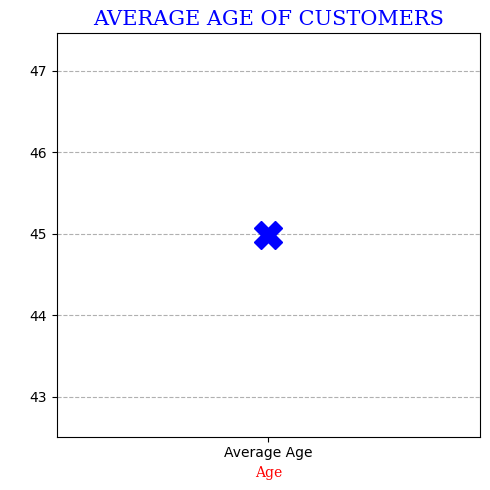

Graph has been displayed successfully.
The average age of customers is 44.98 years.


In [ ]:


# Calculate average age
average_age = df['Age'].mean()

# Make the figure a bit larger
plt.figure(figsize=(5, 5))

# Font settings
font1 = {'family': 'serif', 'color': 'blue', 'size': 15}
font2 = {'family': 'serif', 'color': 'r', 'size': 10}

# Line graph
plt.plot(['Average Age'], [average_age], marker='X',ms=20, color='BLUE', linestyle='-', linewidth=2)

# Titles and labels
plt.title("AVERAGE AGE OF CUSTOMERS", loc="center", fontdict=font1)
plt.xlabel("Age", fontdict=font2)
plt.ylabel(" ", fontdict=font2)

# Grid on y-axis only
plt.grid(axis='y', linestyle='--')

plt.tight_layout()  # Prevent clipping
plt.show()

# Print statements after the graph is shown
print("Graph has been displayed successfully.")
print(f"The average age of customers is {average_age:.2f} years.")


# **<font color="navy">**<font face="Times New Roman"> **2. Visualizing Most Frequent Purchased Item**
## **</font></font>**

<ipython-input-23-c376b86de0c4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequent_product['Item_purchased'], y=frequent_product['Purchased_counts'], palette='viridis')


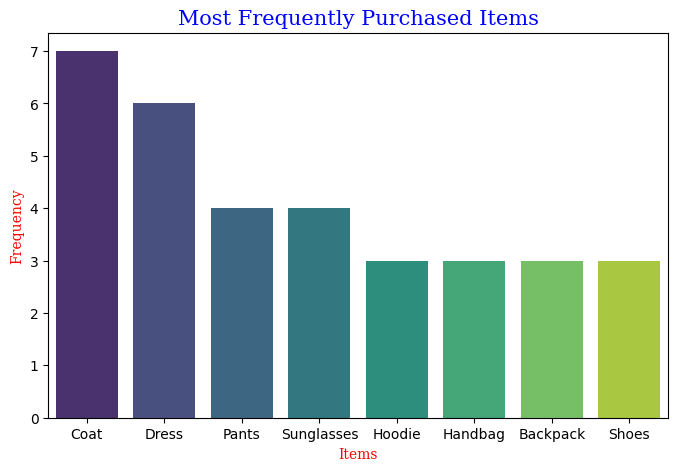

The most frequently purchased item is '4           Coat
5          Dress
12         Pants
20    Sunglasses
8         Hoodie
7        Handbag
0       Backpack
16         Shoes
Name: Item_purchased, dtype: object' with 4     7
5     6
12    4
20    4
8     3
7     3
0     3
16    3
Name: Purchased_counts, dtype: int64 purchases.


In [ ]:


# Group by 'Item_purchased' and count the occurrences
Purchased_counts = df.groupby(['Item_purchased'])['Customer_id'].count().reset_index(name='Purchased_counts')

# Font settings
font1 = {'family': 'serif', 'color': 'blue', 'size': 15}
font2 = {'family': 'serif', 'color': 'r', 'size': 10}

# Sort the result by Purchased_counts in descending order
Purchased_counts = Purchased_counts.sort_values(by='Purchased_counts', ascending=False)

frequent_product = Purchased_counts.head(8)  # Get the top 8 products

# Plotting the bar chart
plt.figure(figsize=(8, 5))

# Use the 'Purchased_counts' column for the y-axis
sns.barplot(x=frequent_product['Item_purchased'], y=frequent_product['Purchased_counts'], palette='viridis')
plt.title('Most Frequently Purchased Items',fontdict=font1)
plt.xlabel('Items',fontdict=font2)
plt.ylabel('Frequency',fontdict=font2)

plt.show()

print(f"The most frequently purchased item is '{frequent_product['Item_purchased']}' with {frequent_product['Purchased_counts']} purchases.")

# **<font color="navy">**<font face="Times New Roman"> **3. Visualizing Top 5 Purchased Items**
## **</font></font>**

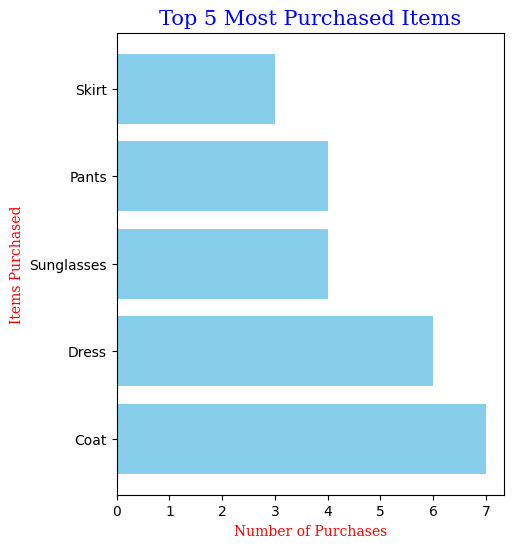

The most purchased item is 'Coat' with 7 purchases.


In [ ]:


# Assuming df is your DataFrame with the 'Item_purchased' column
top_products = df['Item_purchased'].value_counts().head(5)

# Font settings
font1 = {'family': 'serif', 'color': 'blue', 'size': 15}
font2 = {'family': 'serif', 'color': 'r', 'size': 10}

# Create a horizontal bar chart to visualize the top 5 purchased items
plt.figure(figsize=(5, 6))  # Optional: Set figure size for better readability

plt.barh(y=top_products.index, width=top_products.values, color='skyblue')  # Set the bar color

plt.xlabel('Number of Purchases',fontdict=font2)  # Add x-axis label
plt.ylabel('Items Purchased',fontdict=font2)  # Add y-axis label
plt.title('Top 5 Most Purchased Items',fontdict=font1)  # Add title

plt.show()  # Show the plot

print(f"The most purchased item is '{top_products.index[0]}' with {top_products.iloc[0]} purchases.")


# **<font color="navy">**<font face="Times New Roman"> **4. Visualizing  10 Product by total amount**
## **</font></font>**

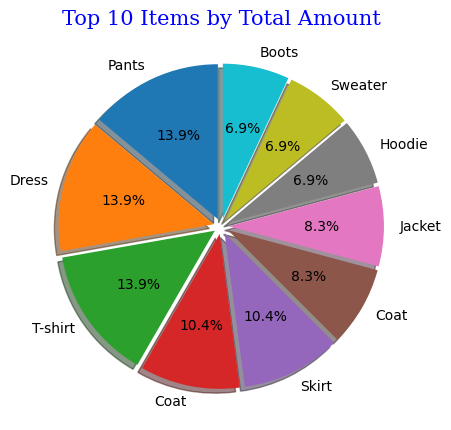

The item generating the highest revenue is 'Pants' with a total amount of 2000.00.


In [ ]:
# Sort by total amount in descending order and take top 10
top_10 = df.sort_values(by="Total_amount", ascending=False).head(10)


# Font settings
font1 = {'family': 'serif', 'color': 'blue', 'size': 15}



# Plot pie chart
plt.figure(figsize=(5, 6))
plt.pie(
    top_10["Total_amount"],
    labels=top_10["Item_purchased"],
    startangle=90,
    shadow=True,
    explode=[0.05] * 10,
    autopct='%1.1f%%'  # Optional: Show percentage on the pie
)
plt.title('Top 10 Items by Total Amount',fontdict=font1)
plt.show()

# Access the first element of the Series using .iloc[0] to get a single value
print(f"The item generating the highest revenue is '{top_10['Item_purchased'].iloc[0]}' with a total amount of {top_10['Total_amount'].iloc[0]:.2f}.")

# **<font color="navy">**<font face="Times New Roman"> **5. Visualizing  Purchase Intent by Count**
## **</font></font>**

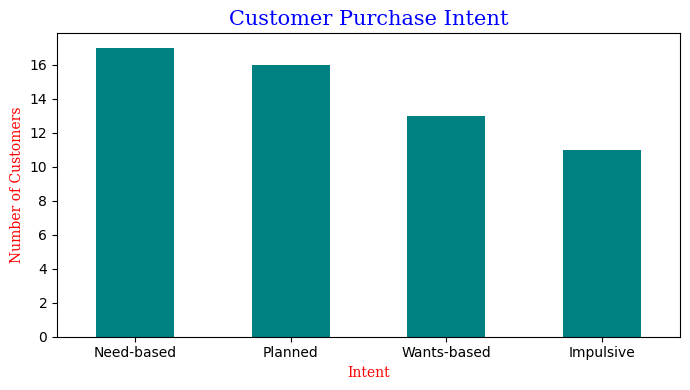

The most common purchase intent is 'Need-based' with 17 customers.


In [ ]:
# Font settings
font1 = {'family': 'serif', 'color': 'blue', 'size': 15}
font2 = {'family': 'serif', 'color': 'r', 'size': 10}

intent_counts = df['Purchase_intent'].value_counts()

# Get the most common intent and its count
top_intent = intent_counts.index[0]  # Get the index (intent) of the highest count
top_count = intent_counts.iloc[0]    # Get the highest count itself

plt.figure(figsize=(7, 4))
intent_counts.plot(kind='bar', color='teal')
plt.title('Customer Purchase Intent',fontdict=font1)
plt.xlabel('Intent',fontdict=font2)
plt.ylabel('Number of Customers',fontdict=font2)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"The most common purchase intent is '{top_intent}' with {top_count} customers.")

# **<font color="navy">**<font face="Times New Roman"> **6. Visualizing  Age vs Total Purchase Amount Using scatter Plot**
## **</font></font>**

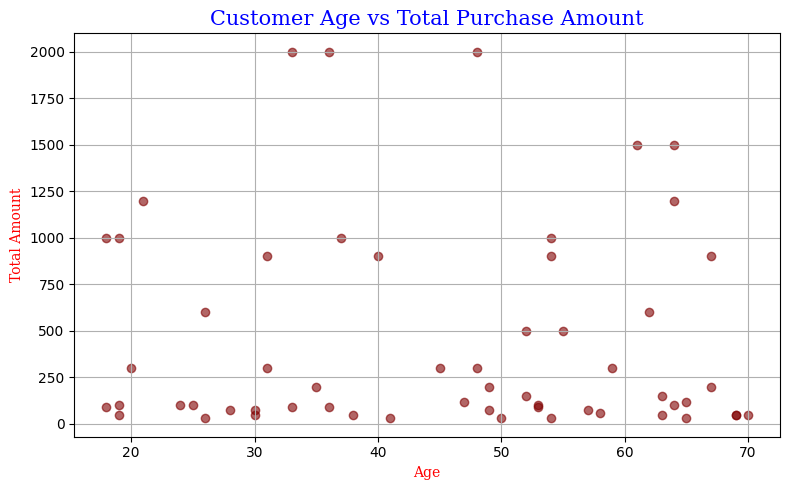

The scatter plot shows the relationship between customer age and total purchase amount.


In [ ]:
# Font settings
font1 = {'family': 'serif', 'color': 'blue', 'size': 15}
font2 = {'family': 'serif', 'color': 'r', 'size': 10}

plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['Total_amount'], alpha=0.6, color='maroon')
plt.title('Customer Age vs Total Purchase Amount',fontdict=font1)
plt.xlabel('Age',fontdict=font2)
plt.ylabel('Total Amount',fontdict=font2)
plt.grid(True)
plt.tight_layout()
plt.show()
print("The scatter plot shows the relationship between customer age and total purchase amount.")

# **<font color="navy">**<font face="Times New Roman"> **7. Visualizing  Time to Decision Distribution Using Histogram**
## **</font></font>**

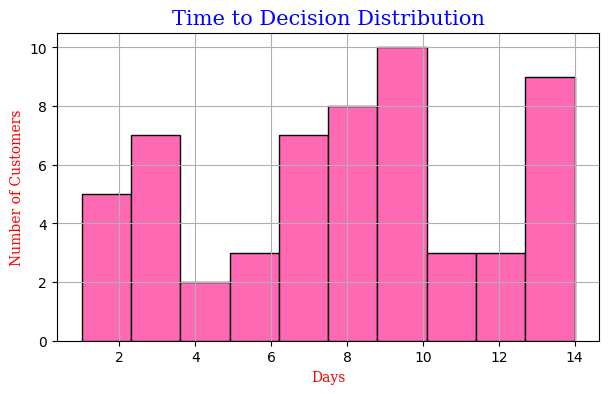

The histogram above shows the distribution of the time customers take to make a purchase decision.
You can observe if the majority of customers take longer or shorter time to decide.


In [ ]:
# Font settings
font1 = {'family': 'serif', 'color': 'blue', 'size': 15}
font2 = {'family': 'serif', 'color': 'r', 'size': 10}

plt.figure(figsize=(7, 4))
plt.hist(df['Time_to_decision'], bins=10, color='hotpink', edgecolor='black')
plt.title('Time to Decision Distribution',fontdict=font1)
plt.xlabel('Days',fontdict=font2)
plt.ylabel('Number of Customers',fontdict=font2)
plt.grid(True)
plt.show()

print("The histogram above shows the distribution of the time customers take to make a purchase decision.")
print("You can observe if the majority of customers take longer or shorter time to decide.")


# **<font color="navy">**<font face="Times New Roman"> **8. Visualizing  Customers are in the loyalty program**
## **</font></font>**

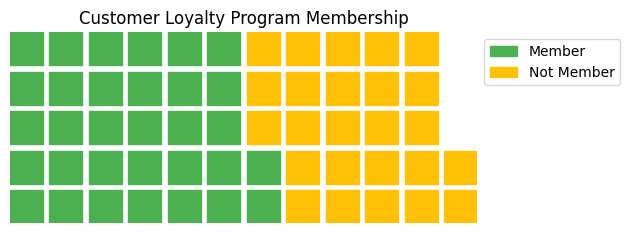

Number of members: 32, Number of non-members: 25.


In [ ]:

# Data preparation
loyalty_counts = df['Customer_loyalty_program_member'].value_counts()
data = {
    'Member' if k else 'Not Member': v
    for k, v in loyalty_counts.items()
}

# Plotting Waffle Chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=data,
    colors=["#4CAF50", "#FFC107"],
    title={'label': 'Customer Loyalty Program Membership', 'loc': 'center'},

    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()

print(f"Number of members: {data.get('Member', 0)}, Number of non-members: {data.get('Not Member', 0)}.")

# **<font color="navy">**<font face="Times New Roman"> **9. Visualizing  Purchase Intent Distribution Using Seaborn**
## **</font></font>**

<ipython-input-30-a12f8a698516>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Purchase_intent', palette='viridis')


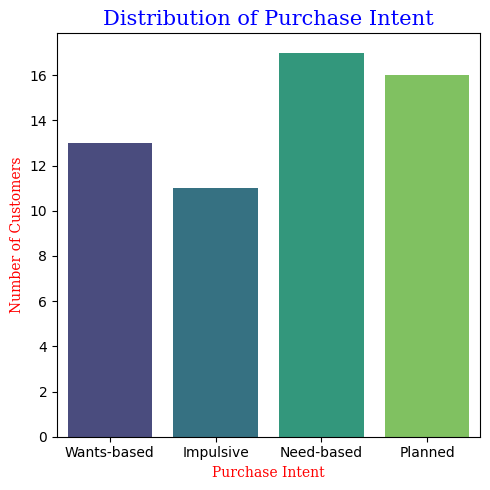

The countplot above shows the distribution of customer purchase intent.
It displays how many customers fall into each intent category.


In [ ]:
plt.figure(figsize=(5, 5))
#using seaborn to plot
# Changed 'Purchase_Intent' to 'Purchase_intent' to match the column name in the DataFrame
sns.countplot(data=df, x='Purchase_intent', palette='viridis')

# Font settings
font1 = {'family': 'serif', 'color': 'blue', 'size': 15}
font2 = {'family': 'serif', 'color': 'r', 'size': 10}


plt.title('Distribution of Purchase Intent',fontdict=font1)
plt.xlabel('Purchase Intent',fontdict=font2)
plt.ylabel('Number of Customers',fontdict=font2)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#  Print statement after the graph
print("The countplot above shows the distribution of customer purchase intent.")
print("It displays how many customers fall into each intent category.")

# **<font color="navy">**<font face="Times New Roman"> **10. Customer Satisfaction Analysis by Month(Time Series Analysis)**
## **</font></font>**

<ipython-input-42-0df2300f4c2f>:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['month_of_year'] == month]['Customer_satisfaction'] for month in range(1, 13)], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


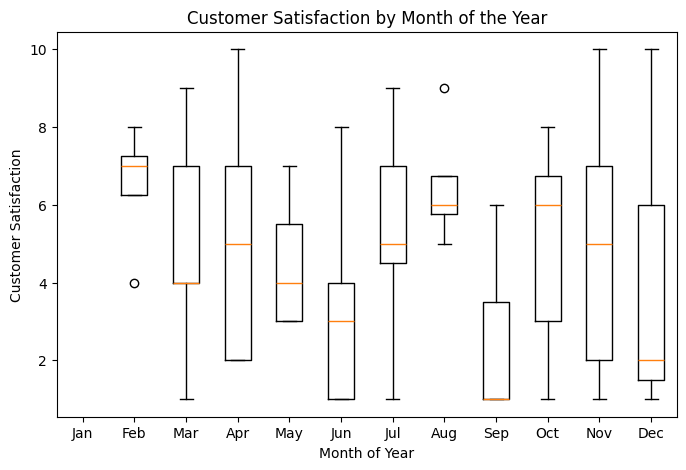

Customer Satisfaction Summary by Month:
               count      mean       std  min   25%  50%   75%   max
month_of_year                                                       
2                4.0  6.500000  1.732051  4.0  6.25  7.0  7.25   8.0
3                5.0  5.000000  3.082207  1.0  4.00  4.0  7.00   9.0
4                5.0  5.200000  3.420526  2.0  2.00  5.0  7.00  10.0
5                4.0  4.500000  1.914854  3.0  3.00  4.0  5.50   7.0
6                9.0  3.111111  2.260777  1.0  1.00  3.0  4.00   8.0
7                7.0  5.428571  2.572751  1.0  4.50  5.0  7.00   9.0
8                4.0  6.500000  1.732051  5.0  5.75  6.0  6.75   9.0
9                3.0  2.666667  2.886751  1.0  1.00  1.0  3.50   6.0
10               6.0  5.000000  2.828427  1.0  3.00  6.0  6.75   8.0
11               7.0  4.857143  3.387653  1.0  2.00  5.0  7.00  10.0
12               3.0  4.333333  4.932883  1.0  1.50  2.0  6.00  10.0


In [ ]:
# Convert 'Time_of_purchase' to datetime objects
df['Time_of_purchase'] = pd.to_datetime(df['Time_of_purchase'])

# Extract month of purchase
df['month_of_year'] = df['Time_of_purchase'].dt.month

# Calculate monthly satisfaction summary (replace with desired calculation)
month_summary = df.groupby('month_of_year')['Customer_satisfaction'].describe()


# Plot customer satisfaction by month of the year
plt.figure(figsize=(8, 5))
plt.boxplot([df[df['month_of_year'] == month]['Customer_satisfaction'] for month in range(1, 13)], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adding title and labels
plt.title('Customer Satisfaction by Month of the Year')
plt.xlabel('Month of Year')
plt.ylabel('Customer Satisfaction')

# Show the plot
plt.show()

print("Customer Satisfaction Summary by Month:")
print(month_summary)

# **<font color="navy">**<font face="Times New Roman"> **11. Visualizing  Boxplot: Time to Decision (outliers in customer behavior)**
## **</font></font>**

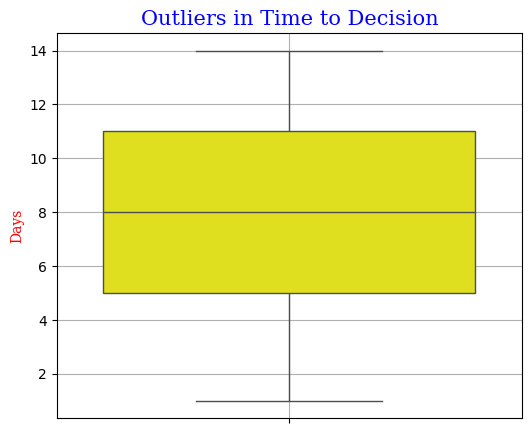

The boxplot above shows the distribution of 'Time to Decision' for customers.
It highlights the median, interquartile range, and outliers in the dataset.


In [ ]:
# Set the size of the figure (width=6 inches, height=5 inches)
plt.figure(figsize=(6, 5))

# Font settings
font1 = {'family': 'serif', 'color': 'blue', 'size': 15}
font2 = {'family': 'serif', 'color': 'r', 'size': 10}


# Create a vertical boxplot to visualize distribution and outliers in 'Time_to_Decision'
# Boxplot shows median, interquartile range, and outliers (points beyond 1.5 * IQR)
sns.boxplot(y=df['Time_to_decision'], color='yellow')

plt.title('Outliers in Time to Decision',fontdict=font1)
plt.ylabel('Days',fontdict=font2)
plt.grid(True)

plt.show()

#  Print statement after the graph
print("The boxplot above shows the distribution of 'Time to Decision' for customers.")
print("It highlights the median, interquartile range, and outliers in the dataset.")
